<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/0605_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-2 데이터 준비

## MNIST 숫자 손글씨 Dataset 불러들이기

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))

2.18.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
60000


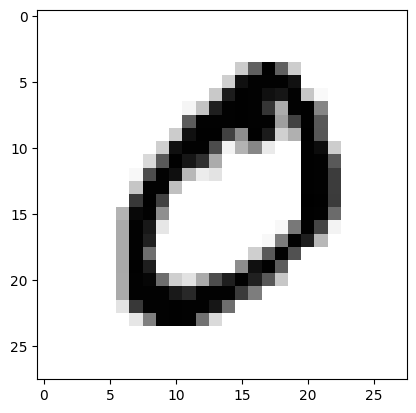

In [ ]:
# 손글씨 이미지 하나 출력
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

In [ ]:
print(y_train[1])

0


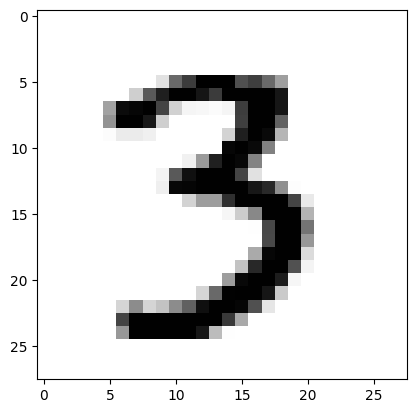

10001 번째 이미지의 숫자는 바로 3 입니다.


In [ ]:
# index에서 0에서 59999 사이 숫자를 지정
index = 10000
plt.imshow(x_train[index], cmap = plt.cm.binary)
plt.show()
print( (index + 1), '번째 이미지의 숫자는 바로', y_train[index], '입니다.')

## train data, test_data
- (x_train, y_train), (x_test, y_test) = mnist.load_data()
- mnist.load( ) 함수를 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나누어서 받아들이는 것

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


In [ ]:
print('최소값:',np.min(x_train), '최대값',np.max(x_train))

최소값: 0 최대값 255


### 인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋습니다. MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0 으로 나누어주면 됩니다. 최소값이 0, 최대값이 1에 근접하도록 나오는지 확인해 봅시다.






In [ ]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), '최대값',np.max(x_train_norm))

최소값: 0.0 최대값 1.0


# 1-3 딥러닝 네트워크 설계
- tf.keras에서 Sequential API라는 방법을 사용

In [ ]:
model = keras.models.Sequential()
# Conv2D(x -> 얼마나 다양한 이미지의 특징을 살펴볼 것인가?,)
# input_shape -> 입력이미지의 형태
# 28x28 사이즈인 흑백 이미지, 마지막 숫자는 차원 수(채널 수), 흑백은 1, 컬러이미지는 3
model.add(keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten()) # Add Flatten layer here
model.add(keras.layers.Dense(32 , activation = 'relu'))
# 32 -> 분류기 알고리즘을 얼마나 복잡하게 할 것인가
model.add(keras.layers.Dense(10, activation = 'softmax'))
# 10 -> 최종 분류기의 class 수, 여기서는 0~9까지 총 10개의 class를 구분하므로 10.

print('Model에 추가된 Layer 개수', len(model.layers))

Model에 추가된 Layer 개수 7


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

# 1-4. 딥러닝 네트워크 학습시키기
- 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태
- print(x_train.shape) 을 해보면, (60000, 28, 28) 로 채널수에 대한 정보가 없다. 따라서 (60000, 28, 28, 1) 로 만들어 주어야 한다.

In [ ]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


-  epochs=10 은 전체 60,000개의 데이터를 10번 반복 사용해서 학습을 시키라는 뜻

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8699 - loss: 0.4300
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9786 - loss: 0.0704
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 17ms/step - accuracy: 0.9848 - loss: 0.0491
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9880 - loss: 0.0382
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9909 - loss: 0.0293
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - accuracy: 0.9921 - loss: 0.0244
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9936 - loss: 0.0195
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9942 - loss: 0.0167
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step - accuracy: 0.9960 - loss: 0.0124
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9962 - loss: 0.0106


# 1-5. 얼마나 잘 만들었는지 확인하기
시험용 데이터(x_test)를 가지고 확인

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: { test_accuracy}")

313/313 - 3s - 10ms/step - accuracy: 0.9891 - loss: 0.0410
test_loss: 0.04102623462677002
test_accuracy: 0.9890999794006348


- model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다.
- 우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수이다. 이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 된다.

In [ ]:
predicted_result = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predicted_result, axis = 1)

idx = 0 # 1 번째 x_test 살펴보기
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
model.predict() 결과 :  [2.0716569e-13 1.4204081e-08 2.4112774e-09 2.7767557e-09 1.3104731e-10
 5.7910848e-10 3.8552361e-18 9.9999994e-01 3.2309674e-10 5.8712093e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


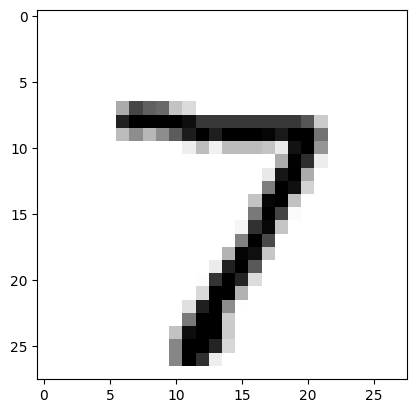

In [ ]:
plt.imshow(x_test[idx], cmap = plt.cm.binary)
plt.show()

예측확률분포: [4.3861571e-01 1.1350121e-07 4.4580150e-01 1.1525008e-01 3.9859202e-10
 1.3065398e-06 3.2209625e-06 4.7358787e-07 3.2225437e-04 5.2835398e-06]
라벨: 3, 예측결과: 2


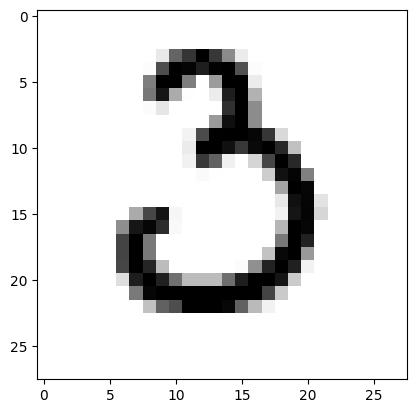

예측확률분포: [9.8860342e-09 6.0166000e-12 5.7355776e-11 1.4657084e-08 1.5877865e-11
 9.9588996e-01 3.6176103e-03 7.0452184e-13 4.9227045e-04 4.6805813e-11]
라벨: 6, 예측결과: 5


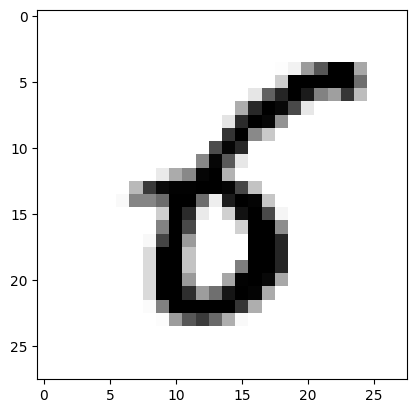

예측확률분포: [3.9066086e-04 2.9921341e-07 5.7004677e-06 4.8371831e-09 2.2154851e-03
 2.4730031e-07 9.9738580e-01 1.6916226e-06 8.6246956e-08 1.0504074e-08]
라벨: 4, 예측결과: 6


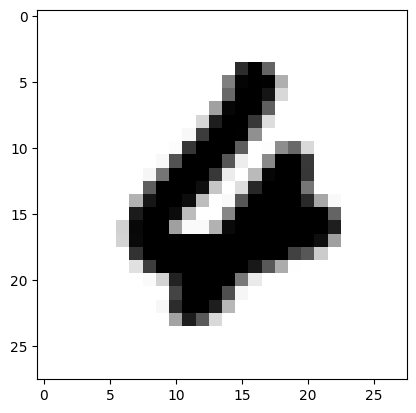

예측확률분포: [1.5985107e-09 1.6319029e-02 1.4251578e-01 3.1214229e-06 8.0146079e-10
 1.4485852e-07 2.9896617e-15 8.4116197e-01 3.1091052e-08 1.2760046e-10]
라벨: 2, 예측결과: 7


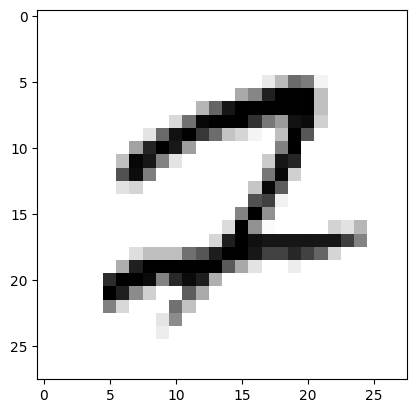

예측확률분포: [2.0401454e-05 1.3674943e-04 9.7240918e-05 1.3930820e-13 8.4899127e-01
 3.8048210e-11 1.5075396e-01 3.9992912e-08 4.8215796e-09 1.8158116e-07]
라벨: 6, 예측결과: 4


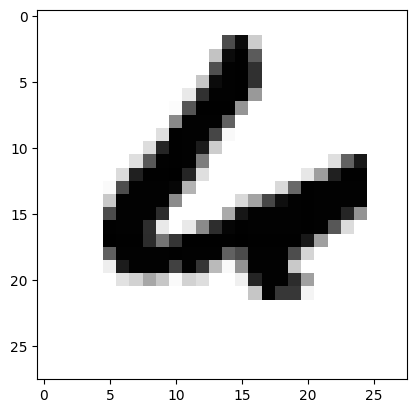

In [ ]:
# model이 추런해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인
import random
wrong_predict_list = []
for i, _ in enumerate(predicted_labels):
  # i번째 test_labels과 y_test이 다른 경우만 모으기
  if predicted_labels[i] != y_test[i]:
    wrong_predict_list.append(i)

# wrong_predict_list에 랜덤하게 5개 뽑기
samples = random.choices(population = wrong_predict_list, k = 5)

for n in samples:
  print("예측확률분포: " + str(predicted_result[n]))
  print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
  plt.imshow(x_test[n], cmap = plt.cm.binary)
  plt.show()

# 1-6. 더 좋은 네트워크 만들어 보기

In [15]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

NameError: name 'keras' is not defined

In [16]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.18.0
2.0.2


In [63]:
!unzip rock.zip -d 가위
!unzip scissor.zip -d 바위
!unzip paper.zip   -d 보

Archive:  rock.zip
   creating: 가위/rock/
  inflating: 가위/__MACOSX/._rock  
  inflating: 가위/rock/63.jpg      
  inflating: 가위/__MACOSX/rock/._63.jpg  
  inflating: 가위/rock/77.jpg      
  inflating: 가위/__MACOSX/rock/._77.jpg  
  inflating: 가위/rock/88.jpg      
  inflating: 가위/__MACOSX/rock/._88.jpg  
  inflating: 가위/rock/89.jpg      
  inflating: 가위/__MACOSX/rock/._89.jpg  
  inflating: 가위/rock/76.jpg      
  inflating: 가위/__MACOSX/rock/._76.jpg  
  inflating: 가위/rock/62.jpg      
  inflating: 가위/__MACOSX/rock/._62.jpg  
  inflating: 가위/rock/74.jpg      
  inflating: 가위/__MACOSX/rock/._74.jpg  
  inflating: 가위/rock/60.jpg      
  inflating: 가위/__MACOSX/rock/._60.jpg  
  inflating: 가위/rock/48.jpg      
  inflating: 가위/__MACOSX/rock/._48.jpg  
  inflating: 가위/rock/49.jpg      
  inflating: 가위/__MACOSX/rock/._49.jpg  
  inflating: 가위/rock/61.jpg      
  inflating: 가위/__MACOSX/rock/._61.jpg  
  inflating: 가위/rock/75.jpg      
  inflating: 가위/__MACOSX/rock/._75.jpg  
  inflating: 가위/rock/59.j

In [17]:
import cv2

image_path = '보/18.jpg'
image = cv2.imread(image_path)

if image is not None:
  print(f"Shape of the image {image_path}: {image.shape}")
else:
  print(f"Could not load image from {image_path}")

Shape of the image 보/18.jpg: (28, 28, 3)


## 데이터 불러오기 + Resize 하기


In [9]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

def resize_images(img_path):
        images=glob.glob(img_path + "/*.jpg")

        print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
        target_size=(28,28)
        for img in images:
                old_img=Image.open(img)
                new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
                new_img.save(img, "JPEG")

        print(len(images), " images resized.")

# 가위, 바위, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어드림
image_dir_path = "./가위"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

PIL 라이브러리 import 완료!
125  images to be resized.
125  images resized.
가위 이미지 resize 완료!


In [72]:
image_dir_path = "./바위"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = "./보"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

158  images to be resized.
158  images resized.
바위 이미지 resize 완료!
169  images to be resized.
169  images resized.
보 이미지 resize 완료!


In [12]:
# 셔플 함수
from sklearn.utils import shuffle
import numpy as np

def load_data(img_path):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    # 데이터의 개수 자동 조정
    all_images = glob.glob(f'./가위/*.jpg') + \
                 glob.glob(f'./바위/*.jpg') + \
                 glob.glob(f'./보/*.jpg')
    number_of_data = len(all_images)

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)



    idx=0
    for file in glob.iglob('./가위/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob('./바위/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob('./보/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "."
(x_train, y_train)=load_data(image_dir_path)

x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 452 입니다.
x_train shape: (452, 28, 28, 3)
y_train shape: (452,)


라벨:  0


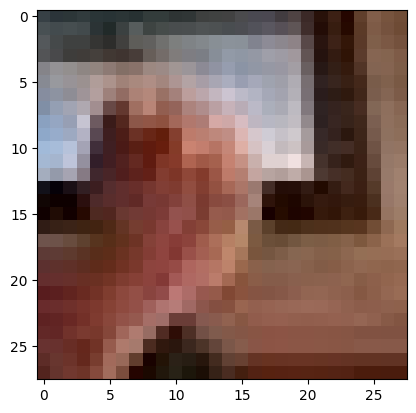

In [74]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])
print('라벨: ', y_train[1])

In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=16
n_dense=16

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation= 'relu',input_shape = (28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        30,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,811 (132.07 KB)

 Trainable params: 33,811 (132.07 KB)

 Non-trainable params: 0 (0.00 B)

## 딥러닝 네트워크 학습

In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3802 - loss: 38.6074
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8277 - loss: 1.0385
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9651 - loss: 0.1337
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0026
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 2.0648e-04
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 6.2796e-05
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 2.7581e-06
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 1.1862e-06


In [7]:
## 압축 해제 코드 -
# 만든 데이터를 Colab에 올려주세요
# 압축파일 이름을 맞춰주세요~

!unzip scissor_test.zip_ -d 가위_test
!unzip rock_test.zip -d 바위_test
!unzip paper_test.zip   -d 보_test

unzip:  cannot find or open scissor_test.zip_, scissor_test.zip_.zip or scissor_test.zip_.ZIP.
Archive:  rock_test.zip
  inflating: 바위_test/89.jpg      
  inflating: 바위_test/__MACOSX/._89.jpg  
  inflating: 바위_test/90.jpg      
  inflating: 바위_test/__MACOSX/._90.jpg  
  inflating: 바위_test/91.jpg      
  inflating: 바위_test/__MACOSX/._91.jpg  
  inflating: 바위_test/92.jpg      
  inflating: 바위_test/__MACOSX/._92.jpg  
  inflating: 바위_test/93.jpg      
  inflating: 바위_test/__MACOSX/._93.jpg  
  inflating: 바위_test/94.jpg      
  inflating: 바위_test/__MACOSX/._94.jpg  
  inflating: 바위_test/95.jpg      
  inflating: 바위_test/__MACOSX/._95.jpg  
  inflating: 바위_test/96.jpg      
  inflating: 바위_test/__MACOSX/._96.jpg  
  inflating: 바위_test/97.jpg      
  inflating: 바위_test/__MACOSX/._97.jpg  
  inflating: 바위_test/98.jpg      
  inflating: 바위_test/__MACOSX/._98.jpg  
  inflating: 바위_test/99.jpg      
  inflating: 바위_test/__MACOSX/._99.jpg  
  inflating: 바위_test/100.jpg     
  inflating: 바위_test/_

In [21]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = "/가위_test"
resize_images(image_dir_path)

image_dir_path = "/바위_test"
resize_images(image_dir_path)

image_dir_path = "/보_test"
resize_images(image_dir_path)

image_dir_path = "."
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

0  images to be resized.
0  images resized.
0  images to be resized.
0  images resized.
0  images to be resized.
0  images resized.
학습데이터(x_train)의 이미지 개수는 452 입니다.
x_test shape: (452, 28, 28, 3)
y_test shape: (452,)


In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

15/15 - 0s - 16ms/step - accuracy: 1.0000 - loss: 7.5270e-07
test_loss: 7.527003731411241e-07 
test_accuracy: 1.0


In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,